# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thebe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("C:\\Users\\thebe\\Fintech\\API_KEYS.env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='Bitcoin')

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='Ethereum')

In [6]:
print(f"Total number btc news: {btc_news['totalResults']}")
print(f"Total number eth news: {eth_news['totalResults']}")

Total number btc news: 19751
Total number eth news: 6277


In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_articles = []
btc_sentiment_scores = []
sid = SentimentIntensityAnalyzer()
for article in btc_news["articles"]:
    btc_articles.append(article['content'])
    btc_sentiment_scores.append(sid.polarity_scores(article['content']))#['compound'])

btc_df = pd.DataFrame({'articles':btc_articles,
                       'sentiment_scores':btc_sentiment_scores})
btc_df.head()

,articles,sentiment_scores
0,El Salvador's President Nayib Bukele has made ...,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp..."
1,El Salvador has become the first country in th...,"{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'comp..."
2,Illustration by Alex Castro / The Verge\r\n\n ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"Last week, whenElon Musk tweeted that he had s...","{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp..."
4,"It's all about clean energy, it seems. \r\nElo...","{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp..."


In [9]:
btc_neg = []
btc_neu = []
btc_pos = []
btc_comp = []
for score in btc_sentiment_scores:
    btc_neg.append(score['neg']),
    btc_neu.append(score['neu']),
    btc_pos.append(score['pos']),
    btc_comp.append(score['compound'])
    

In [46]:
btc_df = pd.DataFrame({'articles':btc_articles,
                       'neg_score':btc_neg,
                       'neu_score':btc_neu,
                       'pos_score':btc_pos,
                       'comp_score':btc_comp})
btc_df.head()

,articles,neg_score,neu_score,pos_score,comp_score
0,El Salvador's President Nayib Bukele has made ...,0.0,0.718,0.282,0.8402
1,El Salvador has become the first country in th...,0.0,0.957,0.043,0.1280
2,Illustration by Alex Castro / The Verge\r\n\n ...,0.0,1.000,0.000,0.0000
3,"Last week, whenElon Musk tweeted that he had s...",0.0,0.925,0.075,0.4754
4,"It's all about clean energy, it seems. \r\nElo...",0.0,0.831,0.169,0.6908


In [11]:
# Create the Ethereum sentiment scores DataFrame
eth_articles = []
eth_sentiment_scores = []

for article in eth_news["articles"]:
    eth_articles.append(article['content'])
    eth_sentiment_scores.append(sid.polarity_scores(article['content']))#['compound'])
    
eth_df = pd.DataFrame({'articles':eth_articles,
                       'sentiment_scores':eth_sentiment_scores})
eth_df.head()

,articles,sentiment_scores
0,TL;DR: The Cryptocurrency with Ethereum and So...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"Bitcoin, Ethereum and a host of Altcoins suffe...","{'neg': 0.087, 'neu': 0.847, 'pos': 0.066, 'co..."
2,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
3,"Ethereum, the second largest cryptocurrency af...","{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp..."
4,A representation of virtual currency Ethereum ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [13]:
eth_neg = []
eth_neu = []
eth_pos = []
eth_comp = []
for score in eth_sentiment_scores:
    eth_neg.append(score['neg']),
    eth_neu.append(score['neu']),
    eth_pos.append(score['pos']),
    eth_comp.append(score['compound'])
    

In [47]:
    
eth_df = pd.DataFrame({'articles':eth_articles,
                       'neg_score':eth_neg,
                       'neu_score':eth_neu,
                       'pos_score':eth_pos,
                       'comp_score':eth_comp})
eth_df.head()

,articles,neg_score,neu_score,pos_score,comp_score
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,1.000,0.000,0.0000
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",0.087,0.847,0.066,-0.2023
2,,0.000,0.000,0.000,0.0000
3,"Ethereum, the second largest cryptocurrency af...",0.068,0.932,0.000,-0.2732
4,A representation of virtual currency Ethereum ...,0.000,1.000,0.000,0.0000


In [48]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,neg_score,neu_score,pos_score,comp_score
count,20.000000,20.00000,20.000000,20.000000
mean,0.038150,0.90030,0.061550,0.080305
std,0.053518,0.06801,0.078104,0.488881
min,0.000000,0.71800,0.000000,-0.762700
25%,0.000000,0.84675,0.000000,-0.273200
50%,0.000000,0.91450,0.043000,0.064000
75%,0.069000,0.93850,0.083000,0.495900
max,0.180000,1.00000,0.282000,0.840200


In [49]:
# Describe the Ethereum Sentiment
eth_df.describe()

,neg_score,neu_score,pos_score,comp_score
count,20.000000,20.000000,20.000000,20.000000
mean,0.050600,0.866250,0.033150,-0.092850
std,0.077435,0.220665,0.049434,0.353291
min,0.000000,0.000000,0.000000,-0.868900
25%,0.000000,0.838250,0.000000,-0.345300
50%,0.000000,0.932000,0.000000,0.000000
75%,0.081750,1.000000,0.066250,0.032000
max,0.286000,1.000000,0.188000,0.670500


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw_addons = []

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower = [word.lower() for word in lem]
    
    # Remove the stop words
    sw = set(stopwords.words('English'))
    tokens = [word for word in lower if word not in sw]
    
    return tokens

In [20]:
# Create a new tokens column for Bitcoin
btc_string = ' '.join(btc_articles)
btc_tokens = tokenizer(btc_string)
# btc_df['Tokens'] = btc_tokens

In [21]:
# Create a new tokens column for Ethereum
eth_string = ' '.join(eth_articles)
eth_tokens = tokenizer(eth_string)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_tokens, n=2)
#print(set(btc_bigrams))

In [24]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = ngrams(eth_tokens, n=2)

In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens)

[('char', 20), ('bitcoin', 16), ('crypto', 8)]

In [27]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens)

[('char', 19), ('ethereum', 8), ('cryptocurrency', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [29]:
wc = WordCloud()

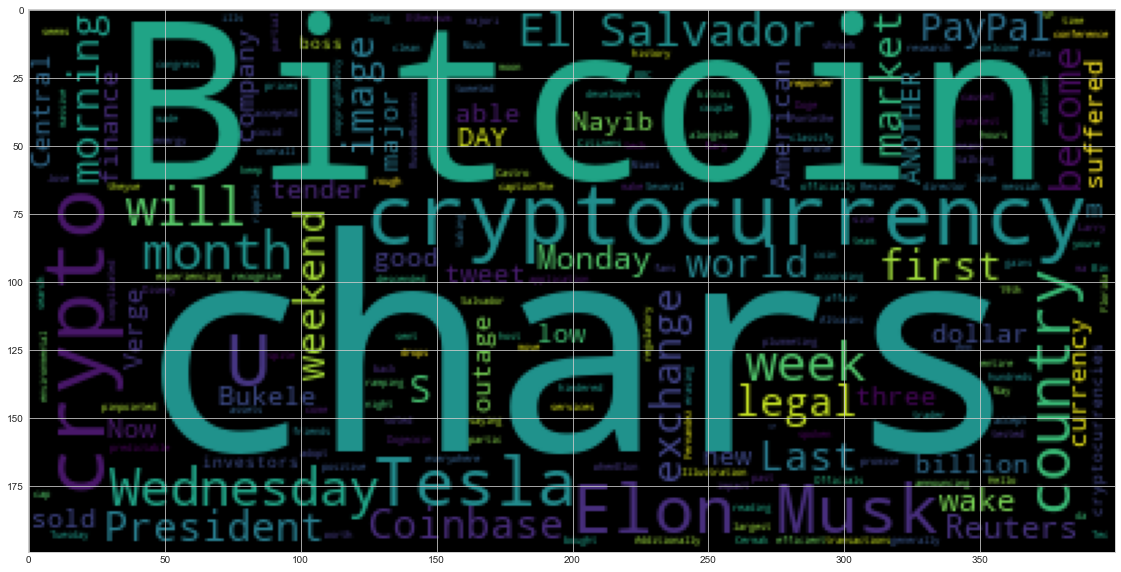

In [30]:
# Generate the Bitcoin word cloud
plt.imshow(wc.generate(btc_string))

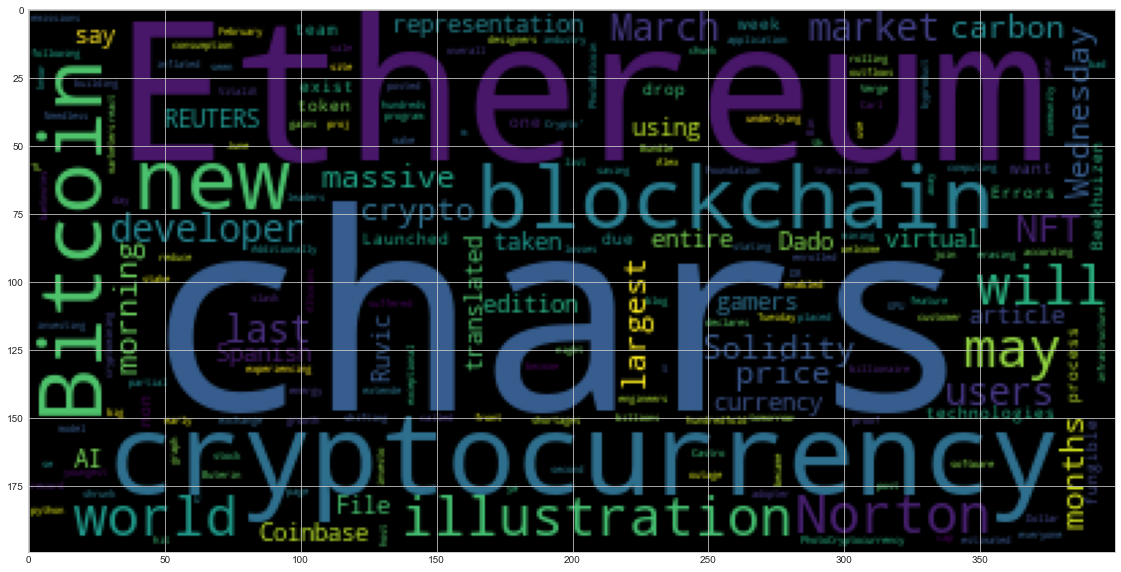

In [31]:
# Generate the Ethereum word cloud
plt.imshow(wc.generate(eth_string))

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
btc_doc = nlp(btc_string)

In [36]:
# Run the NER processor on all of the text


# Add a title to the document
btc_doc.user_data["title"] = "BTC Entities"

In [37]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [38]:
# List all Entities
entities = [ent.text for ent in btc_doc.ents]
entities

["El Salvador's",
 'Nayib Bukele',
 'Central American',
 'El Salvador',
 'first',
 'Nayib Bukele',
 'Wednesday',
 'Citizens',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 'Last week',
 'Musk',
 'Dogecoin',
 'Elon Musk',
 'Tesla',
 'the past few months',
 'first',
 'Tesla',
 '$1.5 billion',
 'Elon Musk',
 'Bitcoin',
 'Bitcoin',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'hours-long',
 'this morning',
 'May 19th',
 'US',
 'El Salvador',
 'first',
 'Bitcoin',
 'Miami',
 'Florida',
 'last weekend',
 'covid-19',
 'Larry Cermak',
 'Last week',
 'Disney',
 'This week',
 'Tec',
 'PayPals',
 'Wednesday',
 'Jose Fernandez da Pontethe',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'US',
 'Donald Trump',
 'Fox Business',
 'Bitcoin',
 'US',
 'Photo',
 'Michele Doying',
 'Verge',
 'Iran',
 'years',
 'PayPal',
 'Soon',
 'PayPal',
 'U.S.',
 'Bitcoin',
 'Monday',
 'February',
 'Elon Musk',
 'T

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
eth_doc = nlp(eth_string)

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
eth_doc.user_data["title"] = "ETH Entities"

In [41]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [42]:
# List all Entities
entities = [ent.text for ent in eth_doc.ents] # if ent.label_ in ['GPE', 'ORG']]
entities

['21.25',
 'June 17',
 '97%',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'second',
 'just months',
 'Ethereum',
 'February 19, 2021',
 'GPU',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 'Spanish',
 'AI',
 'Last May',
 'Buterin',
 '27',
 '99.95%',
 'Carl Beekhuizen',
 'the Ethereum Foundation',
 'Beekhuizen',
 'tomorrow',
 'Norton',
 'Norton',
 'Norton Crypto',
 'Bitcoin',
 'U.S. Dollar',
 'May 26, 2020',
 'Dado Ruvic/File PhotoBitcoin',
 'last week',
 'one-day',
 'March last year',
 'Wednesday',
 '$1 trillion',
 'Entrepreneur',
 'March 2021',
 'more than one million',
 'SafeMoon',
 'decades',
 'Ill',
 'Jacks',
 'CriddleTechnology',
 'Kim Catdarshian',
 'Ethereum',
 'Spanish',
 'AI',
 'This week',
 'March 2020',
 'Tim Berners-Lee',
 'NFT',
 "Sotheby's",
 'NFT']

---